In [107]:
N = 2
M = 1

PM0_u = zeros(N)
PM0_prevU = zeros(N)
PM0_y = zeros(N)
PM0_topoIdx = 1
PM0_D_0_0 = [-1.0 0.0
              0.0 0.0]

function PM0_natPreComm_0() return 1 end
function PM0_natPostComm_0()
    global PM0_u
    u = PM0_u
    return (u[1] + u[2] < 0.0) ? 2 : 1
end

function PM0_forcedComm_0() return 1 end

PM0_D_0_1 = [-0.333333333333333204 -0.333333333333333204
             -0.999999999999999667  3.33333333333333261e-16]

function PM0_natPreComm_1() return 2 end
function PM0_natPostComm_1()
    global PM0_u
    u = PM0_u
    return (u[1] + u[2] >= 0.0) ? 1 : 2
end

function PM0_forcedComm_1() return 2 end

PM0_natPreComm  = Dict(1 => PM0_natPreComm_0,  2 => PM0_natPreComm_1)
PM0_natPostComm = Dict(1 => PM0_natPostComm_0, 2 => PM0_natPostComm_1)
PM0_forcedComm  = Dict(1 => PM0_forcedComm_0,  2 => PM0_forcedComm_1)
PM0_D_0 = Dict(1 => PM0_D_0_0, 2 => PM0_D_0_1)
PM0_topologies = [1, 2]

function diode_PM0_natComm()
    global PM0_topoIdx
    PM0_topoIdx = PM0_natPreComm[PM0_topoIdx]()
    PM0_topoIdx = PM0_natPostComm[PM0_topoIdx]()
end

function diode_PM0_forcedComm()
    global PM0_topoIdx
    PM0_topoIdx = PM0_forcedComm[PM0_topoIdx]();
end

function diode_PM0_output_0()
    global PM0_topoIdx
    global PM0_D_0
    global PM0_y
    global PM0_u
    
    meterIdx = [1, 2]
    PM0_y[meterIdx] .= PM0_D_0[PM0_topoIdx] * PM0_u
end

sampleTime = 1e-11

function diode_initialize()
    global PM0_topoIdx
    PM0_topoIdx = 1;
end

function diode_step!(t)
    global PM0_u
    global PM0_prevU
    
    PM0_u[1]=5.0sin(2π * 2e8 * t)
    PM0_u[2]=0.026 # diode's treshold voltage
    
    diode_PM0_natComm()
    diode_PM0_forcedComm()
    diode_PM0_output_0()
       
    PM0_prevU .= PM0_u
end

diode_step! (generic function with 1 method)

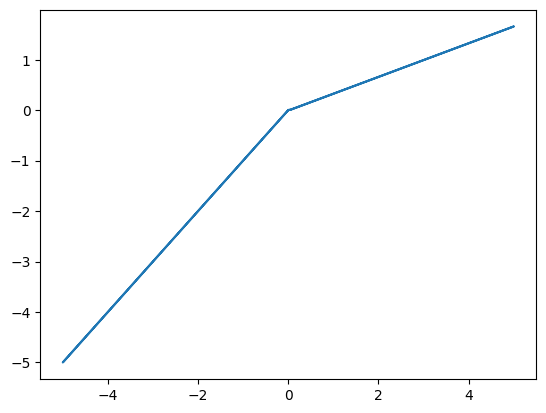

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ff52a9950>

In [108]:
using PyPlot

diode_initialize()
t = range(0, 5e-9, step=sampleTime)
u = similar(t)
y = similar(t)

for i=1:length(t)
    diode_step!(t[i])
    u[i] = PM0_u[1]
    y[i] = PM0_y[1]
end
plot(-u, y)

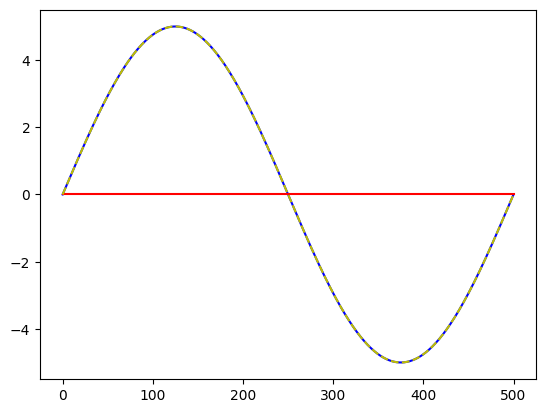

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ff3d1aa90>

In [126]:
using DelimitedFiles
c = readdlm("out.csv", '\t')

plot(c[:, 1], "b-")
plot(c[:, 2], "r-")
plot(u[:, 1], "y--")

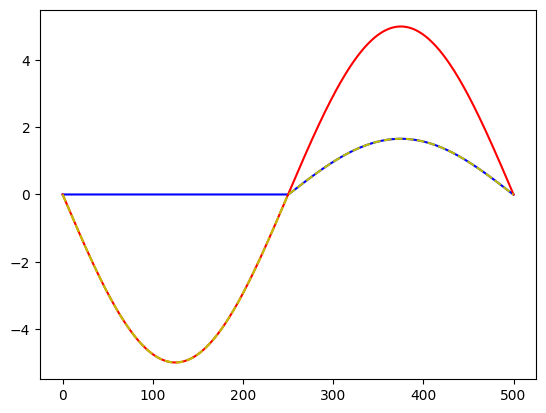

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ff3de8190>

In [127]:
plot(c[:, 3], "b-")
plot(c[:, 4], "r-")
plot(y[:, 1], "y--")